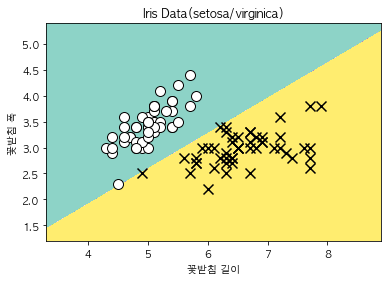

In [1]:
# Perceptron
# Ref: https://datascienceschool.net/view-notebook/342b8e2ecf7a4911a727e6fe97f4ab6b/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx]/2).astype(np.int)

from sklearn.linear_model import Perceptron
from ipywidgets import widgets

def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False, 
                       tol=0, n_iter_no_change=1e9).fit(X,y)
    XX_min = X[:,0].min()-1
    XX_max = X[:,0].max()+1
    YY_min = X[:,1].min()-1
    YY_max = X[:,1].max()+1
    XX, YY = np.meshgrid(np.linspace(XX_min,XX_max,1000),
                         np.linspace(YY_min,YY_max,1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침 길이")
    plt.ylabel("꽃받침 폭")
    plt.title("Iris Data(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

#widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1,max=100,step=1,value=1))
plot_perceptron(300)

In [2]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X,y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

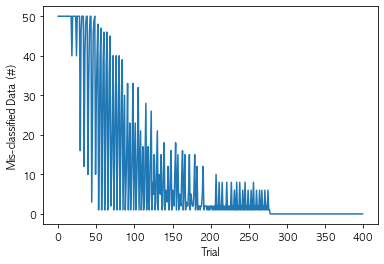

In [3]:
# performance
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
plt.plot(loss)
plt.xlabel("Trial")
plt.ylabel("Mis-classified Data (#)")
plt.show()

In [4]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



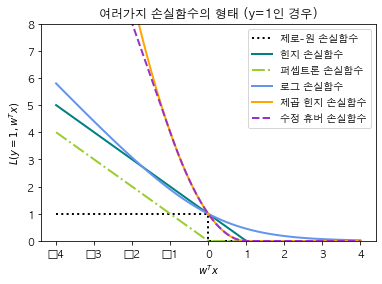

In [5]:
### Stochastic Gradient Descent (SGD)
# - minimizes expected value of loss function, instead of loss function
# - estimates gradients, instead of directly calculates the gradients
#   using small subset of data: minibatche
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1-z[z >= -1]) **2
    loss[z >= 1] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='k', lw=2, ls=":", label="제로-원 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=2, ls="-", label="힌지 손실함수")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=2, ls="-.", label="퍼셉트론 손실함수")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=2, label="로그 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=2, label="제곱 힌지 손실함수")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=2, ls='--', label="수정 휴버 손실함수")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"$w^Tx$")
plt.ylabel(r"$L(y=1, w^Tx)$")
plt.title("여러가지 손실함수의 형태 (y=1인 경우)")
plt.show()

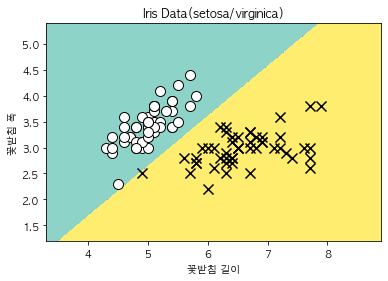

In [6]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False,
                          n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:,0].min()-1
    XX_max = X[:,0].max()+1
    YY_min = X[:,1].min()-1
    YY_max = X[:,1].max()+1
    XX, YY = np.meshgrid(np.linspace(XX_min,XX_max,1000),
                         np.linspace(YY_min,YY_max,1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    #cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침 길이")
    plt.ylabel("꽃받침 폭")
    plt.title("Iris Data(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

plot_sgd(400)

In [7]:
# confusion matrix
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X,y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

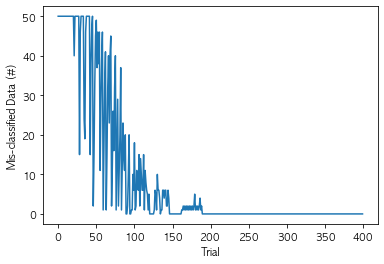

In [8]:
# performance
n = 400
loss = np.zeros(n)
model = SGDClassifier(loss="modified_huber", shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
plt.plot(loss)
plt.xlabel("Trial")
plt.ylabel("Mis-classified Data (#)")
plt.show()

In [9]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



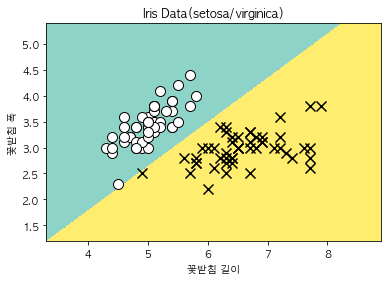

In [10]:
# Perceptron loss function
def plot_sgd_(n):
    model = SGDClassifier(max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:,0].min()-1
    XX_max = X[:,0].max()+1
    YY_min = X[:,1].min()-1
    YY_max = X[:,1].max()+1
    XX, YY = np.meshgrid(np.linspace(XX_min,XX_max,1000),
                         np.linspace(YY_min,YY_max,1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    #cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침 길이")
    plt.ylabel("꽃받침 폭")
    plt.title("Iris Data(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

plot_sgd_(400)

In [11]:
# confusion matrix
model = SGDClassifier(max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X,y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]])

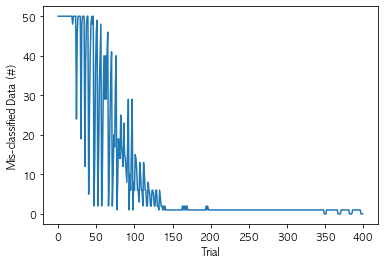

In [12]:
# performance
n = 400
loss = np.zeros(n)
model = SGDClassifier(shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
plt.plot(loss)
plt.xlabel("Trial")
plt.ylabel("Mis-classified Data (#)")
plt.show()

In [13]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

